In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#determinar se uma coluna / variável é numérico ou não
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
df = pd.read_csv('../dados/dadosCompletos.csv', sep=';')

In [3]:
pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

In [4]:
df.sample(5)

id_animal estabelecimento_municipio data_abate  \
264756     264757  RIO VERDE DE MATO GROSSO  24NOV2017   
414064     414065               TRES LAGOAS  01MAR2018   
504442     504443                 JARAGUARI  07MAY2018   
527389     527390                   CAMAPUA  18MAY2018   
725209     725210       SANTA RITA DO PARDO  29AUG2018   

        estabelecimento_identificador  identificador_lote     tipificacao  \
264756                           5351               25009  macho castrado   
414064                           4185               37420           famea   
504442                           6979               47009           famea   
527389                           1835               49142  macho castrado   
725209                           5419               64482   macho inteiro   

            maturidade                                         acabamento  \
264756  Dente de leite  gordura mediana - acima de 3 a ata 6 mm de esp...   
414064  Dente de leite            gordura escassa - 1 a 3 mm de espessura   
504442   Quatro dentes  gordura mediana - acima de 3 a ata 6 mm de esp...   
527389     Seis dentes  gordura mediana - acima de 3 a ata 6 mm de esp...   
725209     Dois dentes            gordura escassa - 1 a 3 mm de espessura   

         peso          motivo_desclassificacao  ...  cnt1m_cl_ituinst  \
264756  283.8                     CLASSIFICADO  ...            0.0938   
414064  232.5                     CLASSIFICADO  ...            0.0313   
504442  202.4                     CLASSIFICADO  ...            0.0000   
527389  300.0  DESCLASSIFICADO PELA MATURIDADE  ...            0.0000   
725209  300.0                     CLASSIFICADO  ...            0.0000   

       cnt3m_cl_itumax cnt3m_cl_ituinst cnt6m_cl_itumax cnt6m_cl_ituinst  \
264756          0.9894           0.0426          0.9293           0.0217   
414064          0.9894           0.1170          0.9801           0.0993   
504442          0.9574           0.0000          0.9728           0.0000   
527389          0.9149           0.0000          0.9385           0.0000   
725209          0.6702           0.0000          0.8043           0.0543   

       cnt12m_cl_itumax cnt12m_cl_ituinst   ano categoria classificacao  
264756           0.9512            0.0762  2017       AAA             1  
414064           0.9408            0.0871  2018        AA             1  
504442           0.8774            0.0000  2018       BBB             1  
527389           0.8643            0.0000  2018         D             0  
725209           0.8801            0.0490  2018        BB             1  

[5 rows x 125 columns]

## Dados Faltantes

In [7]:
#quais missing values e quantos são, qual feature está com mais NaN.
df.isnull().sum().sort_values(ascending=False)

q_qual_alianca                   717338
q_lista_trace                    571523
q_erosaoo_sulco_20_area          231491
q_cobertura_vegetal_80_area      231491
tot7d_chuva                      125666
tot1m_chuva                       51263
q_sisbov                          49296
q_aliancas_mercadolog             49296
q_bpa                             49296
q_classificacao_estabel           49296
q_outros_incentiv                 49296
q_pratica_recuperacao_pa          49296
q_regua_manejo                    49296
q_identificacao_individual        49296
q_fabrica_racao                   49296
cnt7d_cl_itumax                   46570
cnt7d_cl_ituinst                  46519
med7d_tempmin                     46441
med7d_tempmax                     46441
med7d_tempinst                    45274
med7d_umidmin                     45223
med7d_umidinst                    44285
med12m_ndvi                       44204
med12m_num_pixels                 44204
med3m_num_pixels                  44204


In [ ]:
#Calcular a porcentagem de valores ausentes.

In [9]:
round(df.isnull().mean() * 100,2).sort_values(ascending=False)

q_qual_alianca                   67.58
q_lista_trace                    53.84
q_cobertura_vegetal_80_area      21.81
q_erosaoo_sulco_20_area          21.81
tot7d_chuva                      11.84
tot1m_chuva                       4.83
q_sisbov                          4.64
q_identificacao_individual        4.64
q_classificacao_estabel           4.64
q_outros_incentiv                 4.64
q_pratica_recuperacao_pa          4.64
q_aliancas_mercadolog             4.64
q_bpa                             4.64
q_regua_manejo                    4.64
q_fabrica_racao                   4.64
cnt7d_cl_itumax                   4.39
med7d_tempmin                     4.38
med7d_tempmax                     4.38
cnt7d_cl_ituinst                  4.38
med7d_tempinst                    4.27
med7d_umidmin                     4.26
med7d_umidinst                    4.17
med12m_ndvi                       4.16
med7d_umidmax                     4.16
med12m_num_pixels                 4.16
med3m_num_pixels         

In [18]:
#missing_count = df.isnull().sum()
#value_count = df.isnull().count()
#missing_percentage = round(missing_count / value_count * 100,2)

In [19]:
#missing_df = pd.DataFrame({'count': missing_count, 'percentage':missing_percentage})

In [11]:
#print(missing_df)

In [13]:
#barchart = missing_df.plot.bar(y='percentage')
#for index, percentage in enumerate(missing_percentage): barchart.text(index, percentage, str(percentage)+'%')

## Descrição dos dados

In [12]:
#df.describe(include='all').T
df.describe().T

count           mean            std  \
id_animal                      1061451.0  530726.000000  306414.654627   
estabelecimento_identificador  1061451.0    3913.340606    2063.337035   
identificador_lote             1061451.0   46933.560856   22441.555052   
peso                           1061451.0     268.062509      46.513845   
q_classificacao_estabel        1012155.0      24.513777       3.620091   
tot7d_chuva                     935785.0    6984.879556   12369.306301   
med7d_tempinst                 1016177.0      24.107506       2.899904   
med7d_tempmax                  1015010.0      30.837630       2.944770   
med7d_tempmin                  1015010.0      18.915321       3.465536   
med7d_umidinst                 1017166.0      67.407977      11.895551   
med7d_umidmax                  1017322.0      87.127849       9.741808   
med7d_umidmin                  1016228.0      42.515421      12.669623   
med7d_velventomax              1018233.0      14.799115       4.586035   
med7d_formituinst              1061451.0      70.306240       6.954855   
med7d_formitumax               1061451.0      82.723847       9.942608   
med7d_num_pixels               1017247.0   26825.642334   29575.930640   
med7d_ndvi                     1017247.0       0.545676       0.100539   
med7d_evi                      1017247.0       0.346935       0.086788   
med7d_prer_soja                1061451.0      81.171517       8.374413   
med7d_prer_milho               1061451.0      35.603838       4.815065   
med7d_prer_boi                 1061451.0     143.260352       5.570557   
tot1m_chuva                    1010188.0   22434.864365   31119.757976   
med1m_tempinst                 1033465.0      23.927243       2.611175   
med1m_tempmax                  1033296.0      30.714694       2.507344   
med1m_tempmin                  1033296.0      18.678890       3.211675   
med1m_umidinst                 1039259.0      67.174312      10.148309   
med1m_umidmax                  1039090.0      87.046601       8.539983   
med1m_umidmin                  1039090.0      42.160692      10.475772   
med1m_velventomax              1039259.0      14.844265       4.168938   
med1m_formituinst              1061451.0      69.980611       6.417196   
med1m_formitumax               1061451.0      82.432177       9.146227   
med1m_num_pixels               1017247.0   26825.642334   29575.930640   
med1m_ndvi                     1017247.0       0.541885       0.098446   
med1m_evi                      1017247.0       0.342435       0.084089   
med1m_prer_soja                1061451.0      81.135009       8.499948   
med1m_prer_milho               1061451.0      35.539765       4.876560   
med1m_prer_boi                 1061451.0     142.887313       5.520113   
tot3m_chuva                    1044107.0   55481.515050   66558.460760   
med3m_tempinst                 1056202.0      23.589671       2.204532   
med3m_tempmax                  1056202.0      30.561414       2.233700   
med3m_tempmin                  1056202.0      18.192112       2.684616   
med3m_umidinst                 1061271.0      66.621044       8.306025   
med3m_umidmax                  1061271.0      86.879643       7.396039   
med3m_umidmin                  1061271.0      41.112056       8.075668   
med3m_velventomax              1061271.0      14.748823       3.824006   
med3m_formituinst              1061451.0      69.347450       5.479971   
med3m_formitumax               1061451.0      81.942987       7.952395   
med3m_num_pixels               1017247.0   26825.642334   29575.930640   
med3m_ndvi                     1017247.0       0.533443       0.086641   
med3m_evi                      1017247.0       0.332190       0.071566   
med3m_prer_soja                1061451.0      80.610403       8.492598   
med3m_prer_milho               1061451.0      35.382515       4.954285   
med3m_prer_boi                 1061451.0     142.070400       5.100192   
tot6m_chuva                    1061451.

## Gráficos dados numéricos

### Histograma

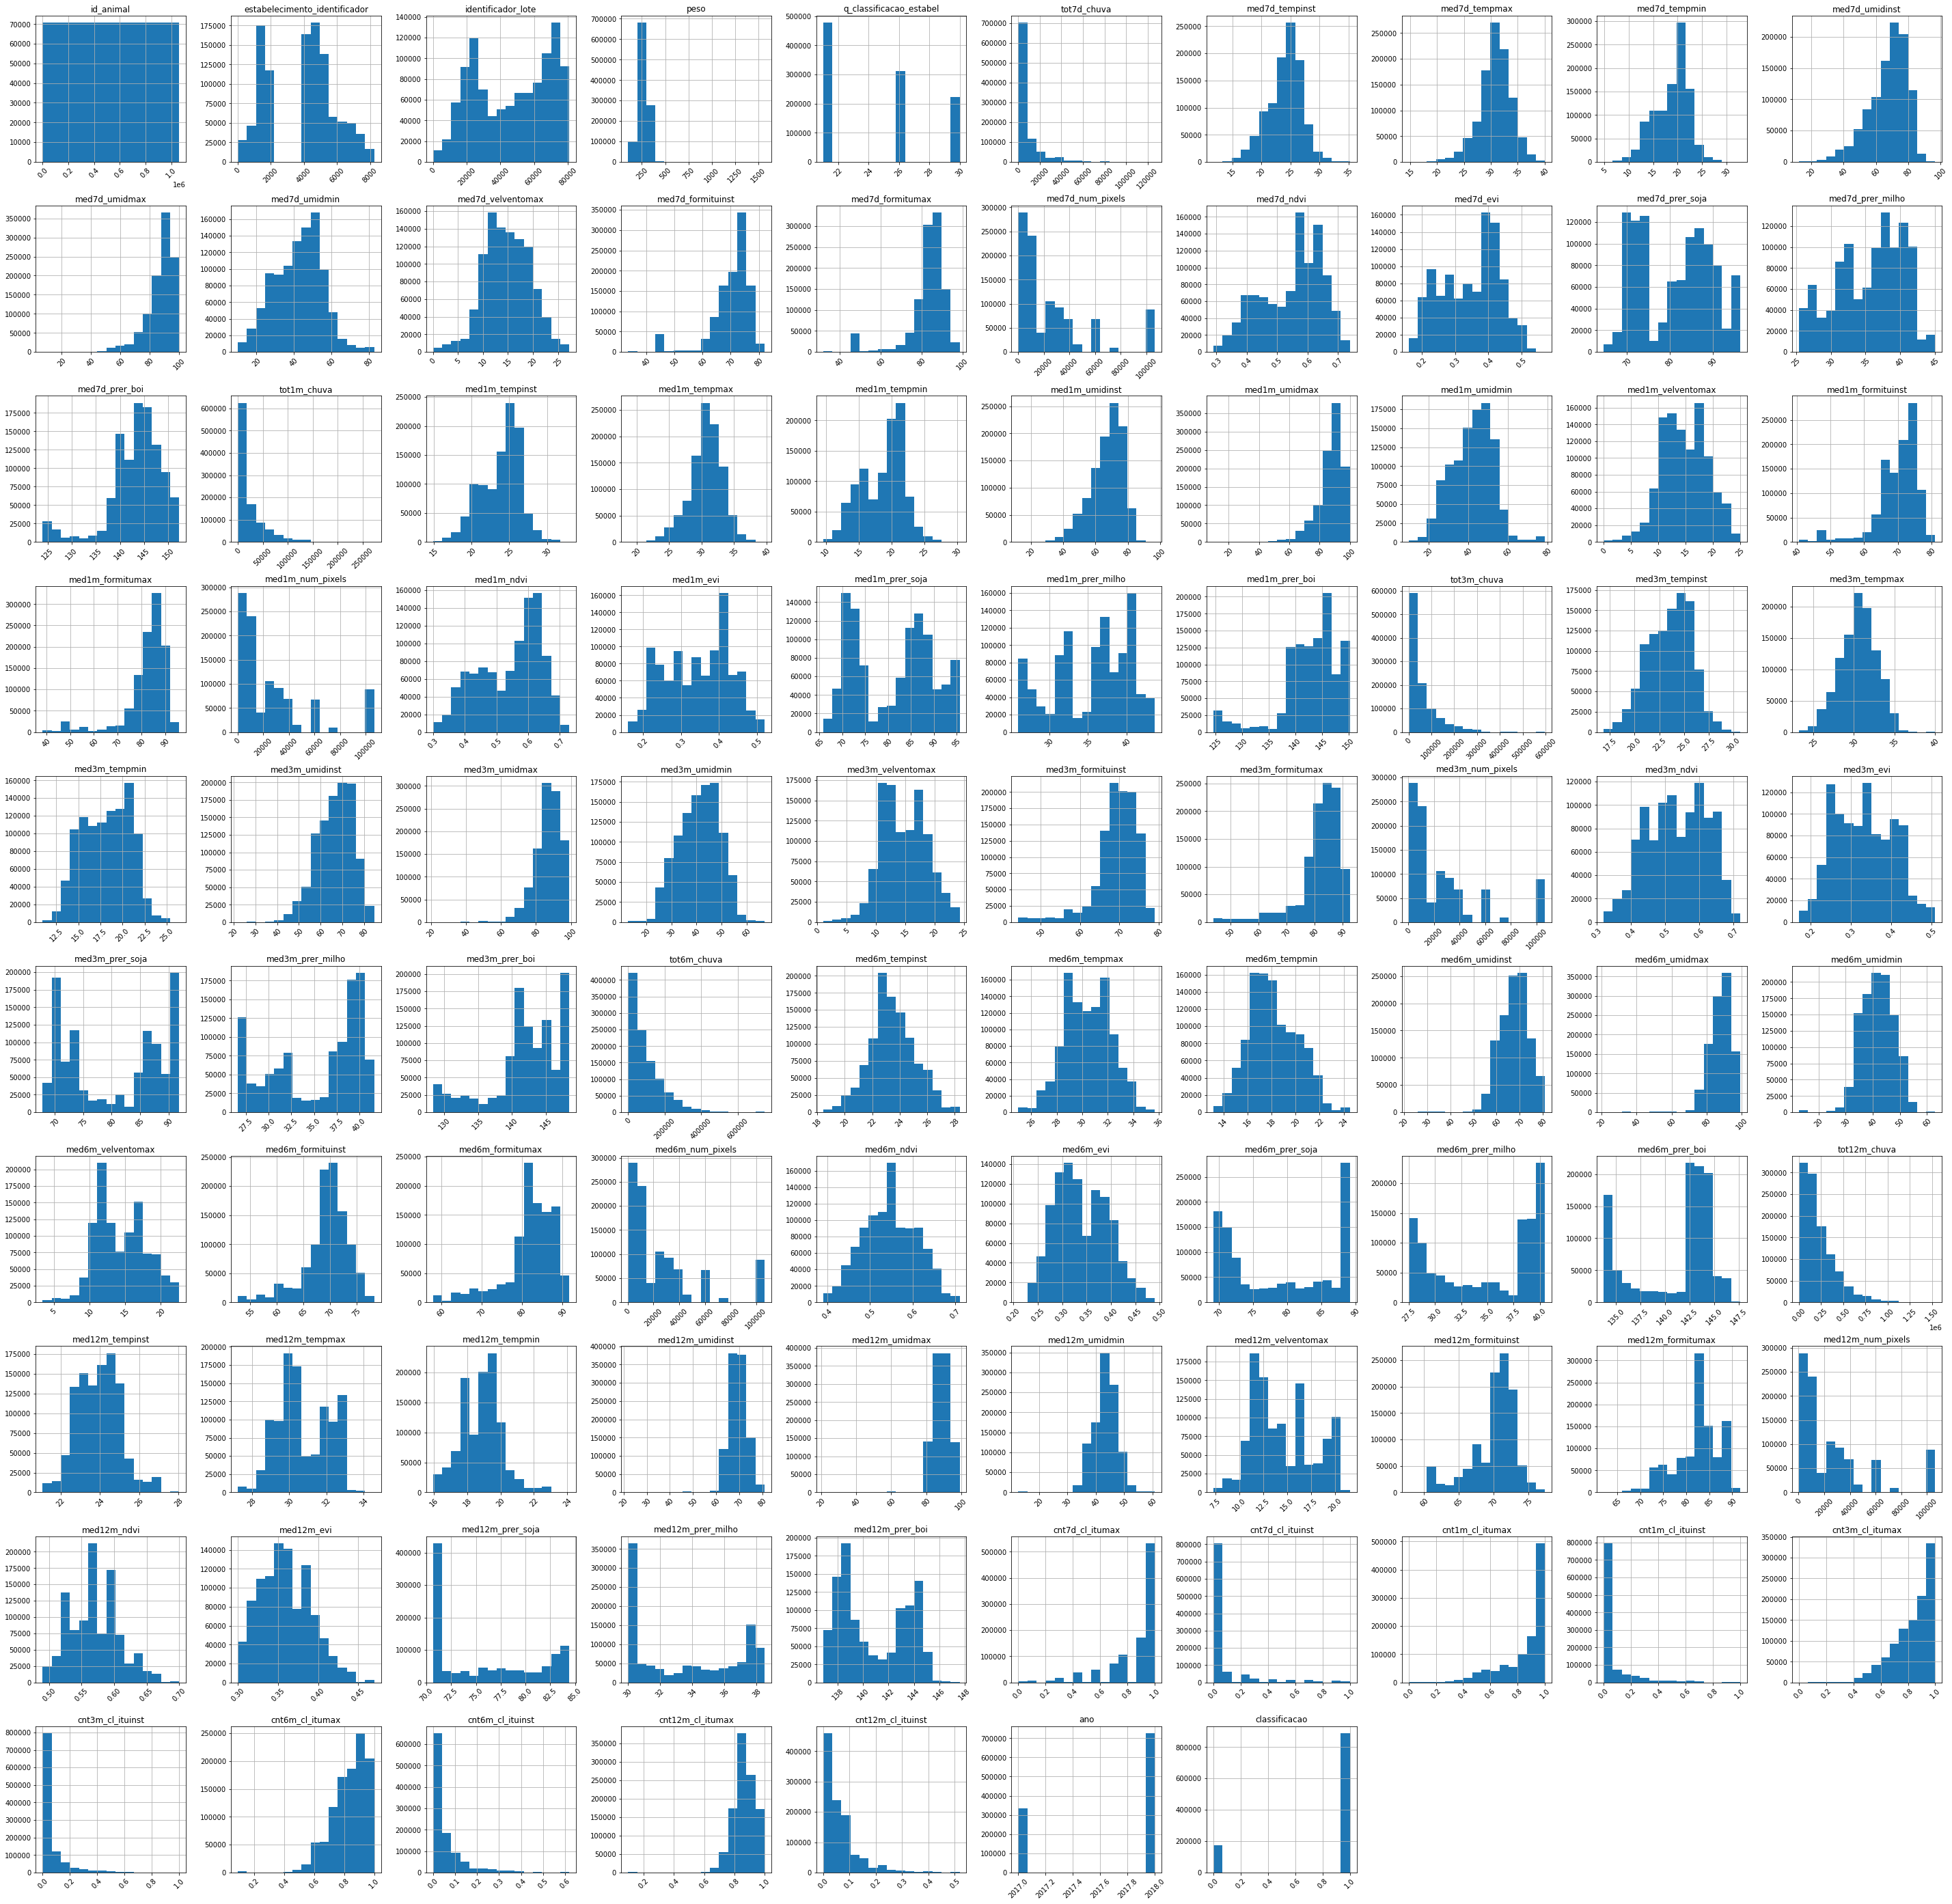

In [7]:
hist_plot = df.hist(figsize=(50,50), xrot=45, bins=15)
plt.savefig('histograma.png', format='png')
plt.show()

### Boxplot

#### Peso

Text(0.5, 1.0, 'Peso')

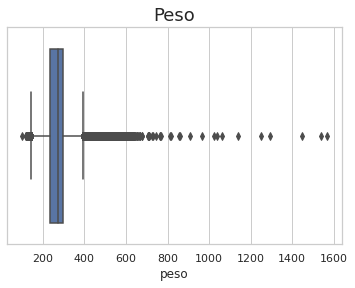

In [130]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.peso)
plt.title("Peso", size=18)


#### Classificação do Estabelecimento

Text(0.5, 1.0, 'Classificação do Estabelecimento')

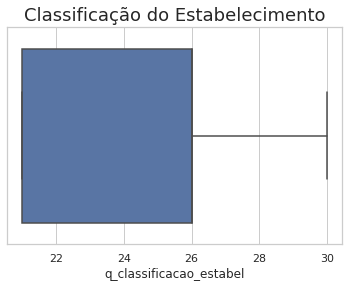

In [131]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.q_classificacao_estabel)
plt.title("Classificação do Estabelecimento", size=18)

Text(0.5, 1.0, 'Classificação do Estabelecimento')

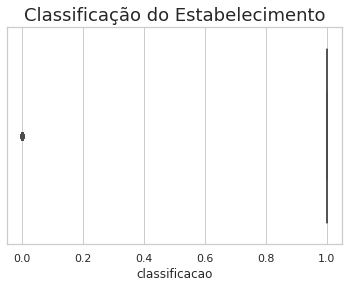

In [132]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.classificacao)
plt.title("Classificação do Estabelecimento", size=18)


## Gráficos de dados categóricos

### Tipificação

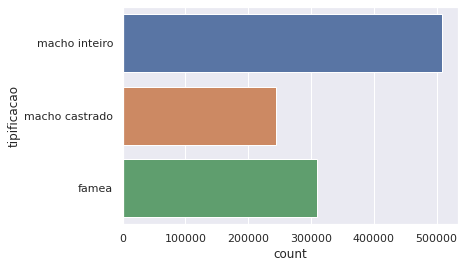

In [65]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="tipificacao", data=df)

### Maturidade

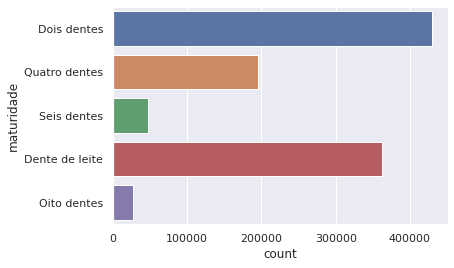

In [64]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="maturidade", data=df)

### Acabamento

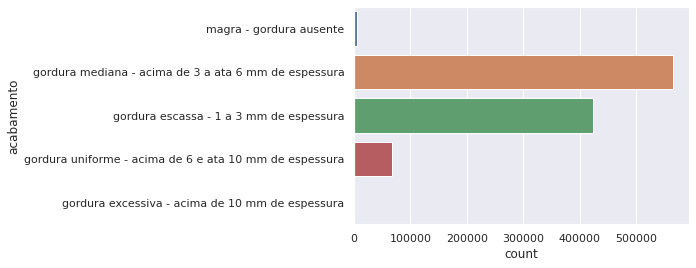

In [66]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="acabamento", data=df)

### Motivo de desclassificacao

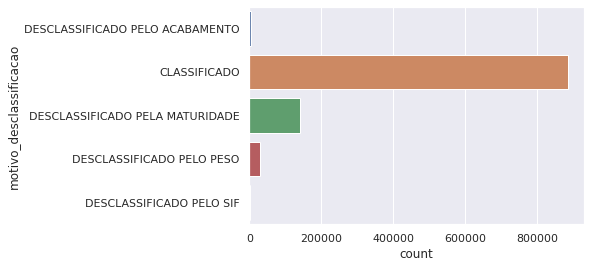

In [67]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="motivo_desclassificacao", data=df)

### Categorias

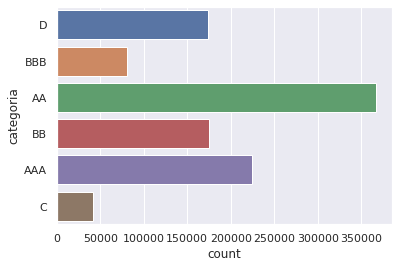

In [69]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="categoria", data=df)

## Matriz de Correlação

In [8]:
plt.figure(figsize=(200,200)) 
sns_plot = sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
fig = sns_plot.get_figure()
fig.savefig("Matriz_Corr.png")